**Imports and includes**

In [1]:
import csv
import numpy as np 
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt 
import pickle
import statistics
import numpy as np  
import sys
import glob

pd.set_option('display.max_rows', 4000)
pd.set_option('display.max_columns', 200)

In [2]:
from langdetect import detect
from langdetect import DetectorFactory
DetectorFactory.seed = 0

In [3]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

**Sentiment analysis function provided by Upasana**

In [4]:
def sentiment_analyzer_score_for_englishOnlyTweet(cleaned_tweet): #this function takes in a tweet that has been detected as an english tweet
    score = analyser.polarity_scores(cleaned_tweet) #so this cleaned_tweet is always an english tweet.
    lb = score['compound']
    return lb

**Create list of all Baseline Users**

In [5]:
# print(glob.glob("/home/adam/*.txt"))
# df = pd.read_csv("/home/updu6059/BaselineUsers/FilteredBaselineUsers.csv")
df = pd.read_csv("/home/updu6059/BaselineUsers/FilteredBaselineUsers_2.csv")
# temp2D = pd.read_csv(, low_memory=False)

# df = pd.read_csv('Filtered_EnglishUsers_DidnotMentionBackUsers.csv')
UserList = list(df['Usernames'])

In [6]:
print("Number of baseline users: " + str(len(UserList)))

Number of baseline users: 8023


**Functions to check for a mention of Donald Trump or Hillary Clinton in a tweet**

In [7]:
def mentions_trump(mention_string):
    if mention_string != "[]": 
        mention_list = mention_string.split(', ')
        mention_list[0] = mention_list[0][1:]
        mention_list[-1] = mention_list[-1][:-1]
        for x in range(len(mention_list)):
            mention_list[x] = mention_list[x][1:]
            mention_list[x] = mention_list[x][:-1]
        for x in range(len(mention_list)):
            if mention_list[x] == 'realdonaldtrump':
                return True
    return False

In [8]:
def mentions_clinton(mention_string):
    if mention_string != "[]": 
        mention_list = mention_string.split(', ')
        mention_list[0] = mention_list[0][1:]
        mention_list[-1] = mention_list[-1][:-1]
        for x in range(len(mention_list)):
            mention_list[x] = mention_list[x][1:]
            mention_list[x] = mention_list[x][:-1]
        for x in range(len(mention_list)):
            if mention_list[x] == 'hillaryclinton':
                return True
    return False

**Calculate monthy values for each user (over the 96 months from Jan 2009 to December 2016)**

In [9]:
timelineDict = {}

In [10]:
firstTweetIndexDict = {}

In [11]:
timelineDF = pd.DataFrame(columns=['username','tweet_count','sentiment_scores', 
                                      'trump_count', 'clinton_count','trump_sent','clinton_sent',
                                      'positive_sent', 'negative_sent'])

In [12]:
size = str(len(UserList))
for i in range(len(UserList)):
# for i in range(100):
    try:
        #read in, reverse order (so oldest is first), reset index
        temp_user_db = pd.read_csv('/home/ira-shared/BaselineUsers/'+UserList[i]+'_tweet_only.csv', low_memory=False)
        temp_user_db = temp_user_db.iloc[::-1]
        temp_user_db.reset_index(drop=True, inplace=True)
        
        #create lists for each metric
        tweet_count = [
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0]
        trump_count = [
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0]
        clinton_count = [
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0]
        sentiment_scores = [
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[]]
        trump_sent = [
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[]]
        clinton_sent = [
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[]]
        positive_sent = [
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[]]
        negative_sent = [
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[]]

        #iterate through user tweets
        first = 1
        for j in range(len(temp_user_db)):

            #step one is assigning an index for the tweet, based on date, or disregarding
            found = 0
            tweetdate = dt.strptime(temp_user_db['date'][j], "%Y-%m-%d")
            for k in range(2009,2017):
                temp_year = k
                date_start = dt(temp_year,1,1)
                date_end = dt(temp_year,12,31)
                if tweetdate < date_start:
                    continue;
                elif tweetdate <= date_end:
                    for m in range(2,14):
                        if m == 13: #month must be December by process of elimination
                            use_index = (((k-2009)*12)+(m-2))
                            found = 1
    #                         print(temp_user_db['date'][j] + " " +str(use_index))
                            break;
                        next_month_start = dt(temp_year,m,1)
                        if tweetdate < next_month_start:
                            use_index = (((k-2009)*12)+(m-2))
                            found = 1
    #                         print(temp_user_db['date'][j] + " " +str(use_index))
                            break;

            #tweet occurred within the period 2009-2016 and was assigned an valid index
            if found == 1:
                if first:
                    firstTweetIndexDict[UserList[i]] = use_index
                    first = 0
                
                tweet_count[use_index] +=1

                tweet_sent = sentiment_analyzer_score_for_englishOnlyTweet(temp_user_db['tweet'][j])
                sentiment_scores[use_index].append(tweet_sent)

                trump_flag = mentions_trump(str(temp_user_db['mentions'][j]))
                clinton_flag = mentions_clinton(str(temp_user_db['mentions'][j]))

                if trump_flag: trump_count[use_index] += 1
                if clinton_flag: clinton_count[use_index] += 1

                if trump_flag and not clinton_flag: trump_sent[use_index].append(tweet_sent)
                if clinton_flag and not trump_flag: clinton_sent[use_index].append(tweet_sent)

                if tweet_sent > 0: positive_sent[use_index].append(tweet_sent)
                if tweet_sent < 0: negative_sent[use_index].append(tweet_sent)

        timelineDict[UserList[i]] = [tweet_count, sentiment_scores, trump_count, clinton_count, 
                                     trump_sent, clinton_sent, positive_sent, negative_sent]

        print(str(i) + " / " + size)
        
    except Exception as e: 
        print(str(UserList[i]) + " failed - " + str(e))

        

0 / 8023
1 / 8023
2 / 8023
3 / 8023
4 / 8023
5 / 8023
6 / 8023
7 / 8023
8 / 8023
9 / 8023
10 / 8023
11 / 8023
12 / 8023
13 / 8023
14 / 8023
15 / 8023
16 / 8023
17 / 8023
18 / 8023
19 / 8023
20 / 8023
21 / 8023
22 / 8023
23 / 8023
24 / 8023
25 / 8023
26 / 8023
27 / 8023
28 / 8023
29 / 8023
30 / 8023
31 / 8023
32 / 8023
33 / 8023
34 / 8023
35 / 8023
36 / 8023
37 / 8023
38 / 8023
39 / 8023
40 / 8023
41 / 8023
42 / 8023
43 / 8023
44 / 8023
45 / 8023
46 / 8023
47 / 8023
48 / 8023
49 / 8023
50 / 8023
51 / 8023
52 / 8023
53 / 8023
54 / 8023
55 / 8023
56 / 8023
57 / 8023
58 / 8023
59 / 8023
60 / 8023
61 / 8023
62 / 8023
63 / 8023
64 / 8023
65 / 8023
66 / 8023
67 / 8023
68 / 8023
69 / 8023
70 / 8023
71 / 8023
72 / 8023
73 / 8023
74 / 8023
75 / 8023
76 / 8023
77 / 8023
78 / 8023
79 / 8023
80 / 8023
81 / 8023
82 / 8023
83 / 8023
84 / 8023
85 / 8023
86 / 8023
87 / 8023
88 / 8023
89 / 8023
90 / 8023
91 / 8023
92 / 8023
93 / 8023
94 / 8023
95 / 8023
96 / 8023
97 / 8023
98 / 8023
99 / 8023
100 / 8023

746 / 8023
747 / 8023
748 / 8023
749 / 8023
750 / 8023
751 / 8023
752 / 8023
753 / 8023
754 / 8023
755 / 8023
756 / 8023
757 / 8023
758 / 8023
759 / 8023
760 / 8023
761 / 8023
762 / 8023
763 / 8023
764 / 8023
765 / 8023
766 / 8023
767 / 8023
768 / 8023
769 / 8023
770 / 8023
771 / 8023
772 / 8023
773 / 8023
774 / 8023
775 / 8023
776 / 8023
777 / 8023
778 / 8023
779 / 8023
780 / 8023
781 / 8023
782 / 8023
783 / 8023
784 / 8023
785 / 8023
786 / 8023
787 / 8023
788 / 8023
789 / 8023
790 / 8023
791 / 8023
792 / 8023
793 / 8023
794 / 8023
795 / 8023
796 / 8023
797 / 8023
798 / 8023
799 / 8023
800 / 8023
801 / 8023
802 / 8023
803 / 8023
804 / 8023
805 / 8023
806 / 8023
807 / 8023
808 / 8023
809 / 8023
810 / 8023
811 / 8023
812 / 8023
813 / 8023
814 / 8023
815 / 8023
816 / 8023
817 / 8023
818 / 8023
819 / 8023
820 / 8023
821 / 8023
822 / 8023
823 / 8023
824 / 8023
825 / 8023
826 / 8023
827 / 8023
828 / 8023
829 / 8023
830 / 8023
831 / 8023
832 / 8023
833 / 8023
834 / 8023
835 / 8023
836 / 8023

1447 / 8023
1448 / 8023
1449 / 8023
1450 / 8023
1451 / 8023
1452 / 8023
1453 / 8023
1454 / 8023
1455 / 8023
1456 / 8023
1457 / 8023
1458 / 8023
1459 / 8023
1460 / 8023
1461 / 8023
1462 / 8023
1463 / 8023
1464 / 8023
1465 / 8023
1466 / 8023
1467 / 8023
1468 / 8023
1469 / 8023
1470 / 8023
1471 / 8023
1472 / 8023
1473 / 8023
1474 / 8023
1475 / 8023
1476 / 8023
1477 / 8023
1478 / 8023
1479 / 8023
1480 / 8023
1481 / 8023
1482 / 8023
1483 / 8023
1484 / 8023
1485 / 8023
1486 / 8023
1487 / 8023
1488 / 8023
1489 / 8023
1490 / 8023
1491 / 8023
1492 / 8023
1493 / 8023
1494 / 8023
1495 / 8023
1496 / 8023
1497 / 8023
1498 / 8023
1499 / 8023
1500 / 8023
1501 / 8023
1502 / 8023
1503 / 8023
1504 / 8023
1505 / 8023
1506 / 8023
1507 / 8023
1508 / 8023
1509 / 8023
1510 / 8023
1511 / 8023
1512 / 8023
1513 / 8023
1514 / 8023
1515 / 8023
1516 / 8023
1517 / 8023
1518 / 8023
1519 / 8023
1520 / 8023
1521 / 8023
1522 / 8023
1523 / 8023
1524 / 8023
1525 / 8023
1526 / 8023
1527 / 8023
1528 / 8023
1529 / 8023
1530

2130 / 8023
2131 / 8023
2132 / 8023
2133 / 8023
2134 / 8023
2135 / 8023
2136 / 8023
2137 / 8023
2138 / 8023
2139 / 8023
2140 / 8023
2141 / 8023
2142 / 8023
2143 / 8023
2144 / 8023
2145 / 8023
2146 / 8023
2147 / 8023
2148 / 8023
2149 / 8023
2150 / 8023
2151 / 8023
2152 / 8023
2153 / 8023
2154 / 8023
2155 / 8023
2156 / 8023
2157 / 8023
2158 / 8023
2159 / 8023
2160 / 8023
2161 / 8023
2162 / 8023
2163 / 8023
2164 / 8023
2165 / 8023
2166 / 8023
2167 / 8023
2168 / 8023
2169 / 8023
2170 / 8023
2171 / 8023
2172 / 8023
2173 / 8023
2174 / 8023
2175 / 8023
2176 / 8023
2177 / 8023
2178 / 8023
2179 / 8023
2180 / 8023
2181 / 8023
2182 / 8023
2183 / 8023
2184 / 8023
2185 / 8023
2186 / 8023
2187 / 8023
2188 / 8023
2189 / 8023
2190 / 8023
2191 / 8023
2192 / 8023
2193 / 8023
2194 / 8023
2195 / 8023
2196 / 8023
2197 / 8023
2198 / 8023
2199 / 8023
2200 / 8023
2201 / 8023
2202 / 8023
2203 / 8023
2204 / 8023
2205 / 8023
2206 / 8023
2207 / 8023
2208 / 8023
2209 / 8023
2210 / 8023
2211 / 8023
2212 / 8023
2213

2809 / 8023
2810 / 8023
2811 / 8023
2812 / 8023
2813 / 8023
2814 / 8023
2815 / 8023
2816 / 8023
2817 / 8023
2818 / 8023
2819 / 8023
2820 / 8023
2821 / 8023
2822 / 8023
2823 / 8023
2824 / 8023
2825 / 8023
2826 / 8023
2827 / 8023
2828 / 8023
2829 / 8023
2830 / 8023
2831 / 8023
2832 / 8023
2833 / 8023
2834 / 8023
2835 / 8023
2836 / 8023
2837 / 8023
2838 / 8023
2839 / 8023
2840 / 8023
2841 / 8023
2842 / 8023
2843 / 8023
2844 / 8023
2845 / 8023
2846 / 8023
2847 / 8023
2848 / 8023
2849 / 8023
2850 / 8023
2851 / 8023
2852 / 8023
2853 / 8023
2854 / 8023
2855 / 8023
2856 / 8023
2857 / 8023
2858 / 8023
2859 / 8023
2860 / 8023
2861 / 8023
2862 / 8023
2863 / 8023
2864 / 8023
2865 / 8023
2866 / 8023
2867 / 8023
2868 / 8023
2869 / 8023
2870 / 8023
2871 / 8023
2872 / 8023
2873 / 8023
2874 / 8023
2875 / 8023
2876 / 8023
2877 / 8023
2878 / 8023
2879 / 8023
2880 / 8023
2881 / 8023
2882 / 8023
2883 / 8023
2884 / 8023
2885 / 8023
2886 / 8023
2887 / 8023
2888 / 8023
2889 / 8023
2890 / 8023
2891 / 8023
2892

3489 / 8023
3490 / 8023
3491 / 8023
3492 / 8023
3493 / 8023
3494 / 8023
3495 / 8023
3496 / 8023
3497 / 8023
3498 / 8023
3499 / 8023
3500 / 8023
3501 / 8023
3502 / 8023
3503 / 8023
3504 / 8023
3505 / 8023
3506 / 8023
3507 / 8023
3508 / 8023
3509 / 8023
3510 / 8023
3511 / 8023
3512 / 8023
3513 / 8023
3514 / 8023
3515 / 8023
3516 / 8023
3517 / 8023
3518 / 8023
3519 / 8023
3520 / 8023
3521 / 8023
3522 / 8023
3523 / 8023
3524 / 8023
3525 / 8023
3526 / 8023
3527 / 8023
3528 / 8023
3529 / 8023
3530 / 8023
3531 / 8023
3532 / 8023
3533 / 8023
3534 / 8023
3535 / 8023
3536 / 8023
3537 / 8023
3538 / 8023
3539 / 8023
3540 / 8023
3541 / 8023
3542 / 8023
3543 / 8023
3544 / 8023
3545 / 8023
3546 / 8023
3547 / 8023
3548 / 8023
3549 / 8023
3550 / 8023
3551 / 8023
3552 / 8023
3553 / 8023
3554 / 8023
3555 / 8023
3556 / 8023
3557 / 8023
3558 / 8023
3559 / 8023
3560 / 8023
3561 / 8023
3562 / 8023
3563 / 8023
3564 / 8023
3565 / 8023
3566 / 8023
3567 / 8023
3568 / 8023
3569 / 8023
3570 / 8023
3571 / 8023
3572

4169 / 8023
4170 / 8023
4171 / 8023
4172 / 8023
4173 / 8023
4174 / 8023
4175 / 8023
4176 / 8023
4177 / 8023
4178 / 8023
4179 / 8023
4180 / 8023
4181 / 8023
4182 / 8023
4183 / 8023
4184 / 8023
4185 / 8023
4186 / 8023
4187 / 8023
4188 / 8023
4189 / 8023
4190 / 8023
4191 / 8023
4192 / 8023
4193 / 8023
4194 / 8023
4195 / 8023
4196 / 8023
4197 / 8023
4198 / 8023
4199 / 8023
4200 / 8023
4201 / 8023
4202 / 8023
4203 / 8023
4204 / 8023
4205 / 8023
4206 / 8023
4207 / 8023
4208 / 8023
4209 / 8023
4210 / 8023
4211 / 8023
4212 / 8023
4213 / 8023
4214 / 8023
4215 / 8023
4216 / 8023
4217 / 8023
4218 / 8023
4219 / 8023
4220 / 8023
4221 / 8023
4222 / 8023
4223 / 8023
4224 / 8023
4225 / 8023
4226 / 8023
4227 / 8023
4228 / 8023
4229 / 8023
4230 / 8023
4231 / 8023
4232 / 8023
4233 / 8023
4234 / 8023
4235 / 8023
4236 / 8023
4237 / 8023
4238 / 8023
4239 / 8023
4240 / 8023
4241 / 8023
4242 / 8023
4243 / 8023
4244 / 8023
4245 / 8023
4246 / 8023
4247 / 8023
4248 / 8023
4249 / 8023
4250 / 8023
4251 / 8023
4252

4852 / 8023
4853 / 8023
4854 / 8023
4855 / 8023
4856 / 8023
4857 / 8023
4858 / 8023
4859 / 8023
4860 / 8023
4861 / 8023
4862 / 8023
4863 / 8023
4864 / 8023
4865 / 8023
4866 / 8023
4867 / 8023
4868 / 8023
4869 / 8023
4870 / 8023
4871 / 8023
4872 / 8023
4873 / 8023
4874 / 8023
4875 / 8023
4876 / 8023
4877 / 8023
4878 / 8023
4879 / 8023
4880 / 8023
4881 / 8023
4882 / 8023
4883 / 8023
4884 / 8023
4885 / 8023
4886 / 8023
4887 / 8023
4888 / 8023
4889 / 8023
4890 / 8023
4891 / 8023
4892 / 8023
4893 / 8023
4894 / 8023
4895 / 8023
4896 / 8023
4897 / 8023
4898 / 8023
4899 / 8023
4900 / 8023
4901 / 8023
4902 / 8023
4903 / 8023
4904 / 8023
4905 / 8023
4906 / 8023
4907 / 8023
4908 / 8023
4909 / 8023
4910 / 8023
4911 / 8023
4912 / 8023
4913 / 8023
4914 / 8023
4915 / 8023
4916 / 8023
4917 / 8023
4918 / 8023
4919 / 8023
4920 / 8023
4921 / 8023
4922 / 8023
4923 / 8023
4924 / 8023
4925 / 8023
4926 / 8023
4927 / 8023
4928 / 8023
4929 / 8023
4930 / 8023
4931 / 8023
4932 / 8023
4933 / 8023
4934 / 8023
4935

5535 / 8023
5536 / 8023
5537 / 8023
5538 / 8023
5539 / 8023
5540 / 8023
5541 / 8023
5542 / 8023
5543 / 8023
5544 / 8023
5545 / 8023
5546 / 8023
5547 / 8023
5548 / 8023
5549 / 8023
5550 / 8023
5551 / 8023
5552 / 8023
5553 / 8023
5554 / 8023
5555 / 8023
5556 / 8023
5557 / 8023
5558 / 8023
5559 / 8023
5560 / 8023
5561 / 8023
5562 / 8023
5563 / 8023
5564 / 8023
5565 / 8023
5566 / 8023
5567 / 8023
5568 / 8023
5569 / 8023
5570 / 8023
5571 / 8023
5572 / 8023
5573 / 8023
5574 / 8023
5575 / 8023
5576 / 8023
5577 / 8023
5578 / 8023
5579 / 8023
5580 / 8023
5581 / 8023
5582 / 8023
5583 / 8023
5584 / 8023
5585 / 8023
5586 / 8023
5587 / 8023
5588 / 8023
5589 / 8023
5590 / 8023
5591 / 8023
5592 / 8023
5593 / 8023
5594 / 8023
5595 / 8023
5596 / 8023
5597 / 8023
5598 / 8023
5599 / 8023
5600 / 8023
5601 / 8023
5602 / 8023
5603 / 8023
5604 / 8023
5605 / 8023
5606 / 8023
5607 / 8023
5608 / 8023
5609 / 8023
5610 / 8023
5611 / 8023
5612 / 8023
5613 / 8023
5614 / 8023
5615 / 8023
5616 / 8023
5617 / 8023
5618

6218 / 8023
6219 / 8023
6220 / 8023
6221 / 8023
6222 / 8023
6223 / 8023
6224 / 8023
6225 / 8023
6226 / 8023
6227 / 8023
6228 / 8023
6229 / 8023
6230 / 8023
6231 / 8023
6232 / 8023
6233 / 8023
6234 / 8023
6235 / 8023
6236 / 8023
6237 / 8023
6238 / 8023
6239 / 8023
6240 / 8023
6241 / 8023
6242 / 8023
6243 / 8023
6244 / 8023
6245 / 8023
6246 / 8023
6247 / 8023
6248 / 8023
6249 / 8023
6250 / 8023
6251 / 8023
6252 / 8023
6253 / 8023
6254 / 8023
6255 / 8023
6256 / 8023
6257 / 8023
6258 / 8023
6259 / 8023
6260 / 8023
6261 / 8023
6262 / 8023
6263 / 8023
6264 / 8023
6265 / 8023
6266 / 8023
6267 / 8023
6268 / 8023
6269 / 8023
6270 / 8023
6271 / 8023
6272 / 8023
6273 / 8023
6274 / 8023
6275 / 8023
6276 / 8023
6277 / 8023
6278 / 8023
6279 / 8023
6280 / 8023
6281 / 8023
6282 / 8023
6283 / 8023
6284 / 8023
6285 / 8023
6286 / 8023
6287 / 8023
6288 / 8023
6289 / 8023
6290 / 8023
6291 / 8023
6292 / 8023
6293 / 8023
6294 / 8023
6295 / 8023
6296 / 8023
6297 / 8023
6298 / 8023
6299 / 8023
6300 / 8023
6301

6897 / 8023
6898 / 8023
6899 / 8023
6900 / 8023
6901 / 8023
6902 / 8023
6903 / 8023
6904 / 8023
6905 / 8023
6906 / 8023
6907 / 8023
6908 / 8023
6909 / 8023
6910 / 8023
6911 / 8023
6912 / 8023
6913 / 8023
6914 / 8023
6915 / 8023
6916 / 8023
6917 / 8023
6918 / 8023
6919 / 8023
6920 / 8023
6921 / 8023
6922 / 8023
6923 / 8023
6924 / 8023
6925 / 8023
6926 / 8023
6927 / 8023
6928 / 8023
6929 / 8023
6930 / 8023
6931 / 8023
6932 / 8023
6933 / 8023
6934 / 8023
6935 / 8023
6936 / 8023
6937 / 8023
6938 / 8023
6939 / 8023
6940 / 8023
6941 / 8023
6942 / 8023
6943 / 8023
6944 / 8023
6945 / 8023
6946 / 8023
6947 / 8023
6948 / 8023
6949 / 8023
6950 / 8023
6951 / 8023
6952 / 8023
6953 / 8023
6954 / 8023
6955 / 8023
6956 / 8023
6957 / 8023
6958 / 8023
6959 / 8023
6960 / 8023
6961 / 8023
6962 / 8023
6963 / 8023
6964 / 8023
6965 / 8023
6966 / 8023
6967 / 8023
6968 / 8023
6969 / 8023
6970 / 8023
6971 / 8023
6972 / 8023
6973 / 8023
6974 / 8023
6975 / 8023
6976 / 8023
6977 / 8023
6978 / 8023
6979 / 8023
6980

7580 / 8023
7581 / 8023
7582 / 8023
7583 / 8023
7584 / 8023
7585 / 8023
7586 / 8023
7587 / 8023
7588 / 8023
7589 / 8023
7590 / 8023
7591 / 8023
7592 / 8023
7593 / 8023
7594 / 8023
7595 / 8023
7596 / 8023
7597 / 8023
7598 / 8023
7599 / 8023
7600 / 8023
7601 / 8023
7602 / 8023
7603 / 8023
7604 / 8023
7605 / 8023
7606 / 8023
7607 / 8023
7608 / 8023
7609 / 8023
7610 / 8023
7611 / 8023
7612 / 8023
7613 / 8023
7614 / 8023
7615 / 8023
7616 / 8023
7617 / 8023
7618 / 8023
7619 / 8023
7620 / 8023
7621 / 8023
7622 / 8023
7623 / 8023
7624 / 8023
7625 / 8023
7626 / 8023
7627 / 8023
7628 / 8023
7629 / 8023
7630 / 8023
7631 / 8023
7632 / 8023
7633 / 8023
7634 / 8023
7635 / 8023
7636 / 8023
7637 / 8023
7638 / 8023
7639 / 8023
7640 / 8023
7641 / 8023
7642 / 8023
7643 / 8023
7644 / 8023
7645 / 8023
7646 / 8023
7647 / 8023
7648 / 8023
7649 / 8023
7650 / 8023
7651 / 8023
7652 / 8023
7653 / 8023
7654 / 8023
7655 / 8023
7656 / 8023
7657 / 8023
7658 / 8023
7659 / 8023
7660 / 8023
7661 / 8023
7662 / 8023
7663

In [13]:
len(firstTweetIndexDict)

8023

In [14]:
for i in range(len(timelineDF)):
    try:
        test = firstTweetIndexDict[timelineDF['username'][i]]
    except:
        print(timelineDF['username'][i] + ' failed [' +str(i)+']' )

In [15]:
timelineDF = pd.DataFrame.from_dict(timelineDict, orient='index',columns=['tweet_count','sentiment_scores', 
                                      'trump_count', 'clinton_count','trump_sent','clinton_sent',
                                      'positive_sent', 'negative_sent'])

timelineDF.index.name = 'username'
timelineDF.reset_index(inplace=True)


In [16]:
len(timelineDF)

8016

In [17]:
tweet_countDict = {}
sentiment_scoresDict = {}
trump_countDict = {}
clinton_countDict = {}
trump_sentDict = {}
clinton_sentDict = {}
positive_sentDict = {}
negative_sentDict = {} 

In [18]:
size = str(len(timelineDF))
for i in range(len(timelineDF)):
    start_index = firstTweetIndexDict[timelineDF['username'][i]]
    
    tweet_count = []
    sentiment_scores = []
    trump_count = []
    clinton_count = []
    trump_sent = []
    clinton_sent = []
    positive_sent = []
    negative_sent = [] 
    
    for j in range(0,96):
        if j >= start_index:
            tweet_count.append(timelineDF['tweet_count'][i][j])
            trump_count.append(timelineDF['trump_count'][i][j])
            clinton_count.append(timelineDF['clinton_count'][i][j])
            
            if(len(timelineDF['sentiment_scores'][i][j]) > 0):
                sentiment_scores.append(statistics.mean(timelineDF['sentiment_scores'][i][j]))
            else:
                sentiment_scores.append(np.nan)
            
            if(len(timelineDF['trump_sent'][i][j]) > 0):
                trump_sent.append(statistics.mean(timelineDF['trump_sent'][i][j]))
            else:
                trump_sent.append(np.nan)
            
            if(len(timelineDF['clinton_sent'][i][j]) > 0):
                clinton_sent.append(statistics.mean(timelineDF['clinton_sent'][i][j]))
            else:
                clinton_sent.append(np.nan)
                
            if(len(timelineDF['positive_sent'][i][j]) > 0):
                positive_sent.append(statistics.mean(timelineDF['positive_sent'][i][j]))
            else:
                positive_sent.append(np.nan)
                
            if(len(timelineDF['negative_sent'][i][j]) > 0):
                negative_sent.append(statistics.mean(timelineDF['negative_sent'][i][j]))
            else:
                negative_sent.append(np.nan)
                        
        else:
            tweet_count.append(np.nan)
            trump_count.append(np.nan)
            clinton_count.append(np.nan)
            sentiment_scores.append(np.nan)
            trump_sent.append(np.nan)
            clinton_sent.append(np.nan)
            positive_sent.append(np.nan)
            negative_sent.append(np.nan)
    
    tweet_countDict[timelineDF['username'][i]] = tweet_count
    sentiment_scoresDict[timelineDF['username'][i]] = sentiment_scores
    trump_countDict[timelineDF['username'][i]] = trump_count
    clinton_countDict[timelineDF['username'][i]] = clinton_count
    trump_sentDict[timelineDF['username'][i]] = trump_sent
    clinton_sentDict[timelineDF['username'][i]] = clinton_sent
    positive_sentDict[timelineDF['username'][i]] = positive_sent
    negative_sentDict[timelineDF['username'][i]] =  negative_sent 
    
    print(str(i) + " / " + size)

0 / 8016
1 / 8016
2 / 8016
3 / 8016
4 / 8016
5 / 8016
6 / 8016
7 / 8016
8 / 8016
9 / 8016
10 / 8016
11 / 8016
12 / 8016
13 / 8016
14 / 8016
15 / 8016
16 / 8016
17 / 8016
18 / 8016
19 / 8016
20 / 8016
21 / 8016
22 / 8016
23 / 8016
24 / 8016
25 / 8016
26 / 8016
27 / 8016
28 / 8016
29 / 8016
30 / 8016
31 / 8016
32 / 8016
33 / 8016
34 / 8016
35 / 8016
36 / 8016
37 / 8016
38 / 8016
39 / 8016
40 / 8016
41 / 8016
42 / 8016
43 / 8016
44 / 8016
45 / 8016
46 / 8016
47 / 8016
48 / 8016
49 / 8016
50 / 8016
51 / 8016
52 / 8016
53 / 8016
54 / 8016
55 / 8016
56 / 8016
57 / 8016
58 / 8016
59 / 8016
60 / 8016
61 / 8016
62 / 8016
63 / 8016
64 / 8016
65 / 8016
66 / 8016
67 / 8016
68 / 8016
69 / 8016
70 / 8016
71 / 8016
72 / 8016
73 / 8016
74 / 8016
75 / 8016
76 / 8016
77 / 8016
78 / 8016
79 / 8016
80 / 8016
81 / 8016
82 / 8016
83 / 8016
84 / 8016
85 / 8016
86 / 8016
87 / 8016
88 / 8016
89 / 8016
90 / 8016
91 / 8016
92 / 8016
93 / 8016
94 / 8016
95 / 8016
96 / 8016
97 / 8016
98 / 8016
99 / 8016
100 / 8016

764 / 8016
765 / 8016
766 / 8016
767 / 8016
768 / 8016
769 / 8016
770 / 8016
771 / 8016
772 / 8016
773 / 8016
774 / 8016
775 / 8016
776 / 8016
777 / 8016
778 / 8016
779 / 8016
780 / 8016
781 / 8016
782 / 8016
783 / 8016
784 / 8016
785 / 8016
786 / 8016
787 / 8016
788 / 8016
789 / 8016
790 / 8016
791 / 8016
792 / 8016
793 / 8016
794 / 8016
795 / 8016
796 / 8016
797 / 8016
798 / 8016
799 / 8016
800 / 8016
801 / 8016
802 / 8016
803 / 8016
804 / 8016
805 / 8016
806 / 8016
807 / 8016
808 / 8016
809 / 8016
810 / 8016
811 / 8016
812 / 8016
813 / 8016
814 / 8016
815 / 8016
816 / 8016
817 / 8016
818 / 8016
819 / 8016
820 / 8016
821 / 8016
822 / 8016
823 / 8016
824 / 8016
825 / 8016
826 / 8016
827 / 8016
828 / 8016
829 / 8016
830 / 8016
831 / 8016
832 / 8016
833 / 8016
834 / 8016
835 / 8016
836 / 8016
837 / 8016
838 / 8016
839 / 8016
840 / 8016
841 / 8016
842 / 8016
843 / 8016
844 / 8016
845 / 8016
846 / 8016
847 / 8016
848 / 8016
849 / 8016
850 / 8016
851 / 8016
852 / 8016
853 / 8016
854 / 8016

1469 / 8016
1470 / 8016
1471 / 8016
1472 / 8016
1473 / 8016
1474 / 8016
1475 / 8016
1476 / 8016
1477 / 8016
1478 / 8016
1479 / 8016
1480 / 8016
1481 / 8016
1482 / 8016
1483 / 8016
1484 / 8016
1485 / 8016
1486 / 8016
1487 / 8016
1488 / 8016
1489 / 8016
1490 / 8016
1491 / 8016
1492 / 8016
1493 / 8016
1494 / 8016
1495 / 8016
1496 / 8016
1497 / 8016
1498 / 8016
1499 / 8016
1500 / 8016
1501 / 8016
1502 / 8016
1503 / 8016
1504 / 8016
1505 / 8016
1506 / 8016
1507 / 8016
1508 / 8016
1509 / 8016
1510 / 8016
1511 / 8016
1512 / 8016
1513 / 8016
1514 / 8016
1515 / 8016
1516 / 8016
1517 / 8016
1518 / 8016
1519 / 8016
1520 / 8016
1521 / 8016
1522 / 8016
1523 / 8016
1524 / 8016
1525 / 8016
1526 / 8016
1527 / 8016
1528 / 8016
1529 / 8016
1530 / 8016
1531 / 8016
1532 / 8016
1533 / 8016
1534 / 8016
1535 / 8016
1536 / 8016
1537 / 8016
1538 / 8016
1539 / 8016
1540 / 8016
1541 / 8016
1542 / 8016
1543 / 8016
1544 / 8016
1545 / 8016
1546 / 8016
1547 / 8016
1548 / 8016
1549 / 8016
1550 / 8016
1551 / 8016
1552

2160 / 8016
2161 / 8016
2162 / 8016
2163 / 8016
2164 / 8016
2165 / 8016
2166 / 8016
2167 / 8016
2168 / 8016
2169 / 8016
2170 / 8016
2171 / 8016
2172 / 8016
2173 / 8016
2174 / 8016
2175 / 8016
2176 / 8016
2177 / 8016
2178 / 8016
2179 / 8016
2180 / 8016
2181 / 8016
2182 / 8016
2183 / 8016
2184 / 8016
2185 / 8016
2186 / 8016
2187 / 8016
2188 / 8016
2189 / 8016
2190 / 8016
2191 / 8016
2192 / 8016
2193 / 8016
2194 / 8016
2195 / 8016
2196 / 8016
2197 / 8016
2198 / 8016
2199 / 8016
2200 / 8016
2201 / 8016
2202 / 8016
2203 / 8016
2204 / 8016
2205 / 8016
2206 / 8016
2207 / 8016
2208 / 8016
2209 / 8016
2210 / 8016
2211 / 8016
2212 / 8016
2213 / 8016
2214 / 8016
2215 / 8016
2216 / 8016
2217 / 8016
2218 / 8016
2219 / 8016
2220 / 8016
2221 / 8016
2222 / 8016
2223 / 8016
2224 / 8016
2225 / 8016
2226 / 8016
2227 / 8016
2228 / 8016
2229 / 8016
2230 / 8016
2231 / 8016
2232 / 8016
2233 / 8016
2234 / 8016
2235 / 8016
2236 / 8016
2237 / 8016
2238 / 8016
2239 / 8016
2240 / 8016
2241 / 8016
2242 / 8016
2243

2846 / 8016
2847 / 8016
2848 / 8016
2849 / 8016
2850 / 8016
2851 / 8016
2852 / 8016
2853 / 8016
2854 / 8016
2855 / 8016
2856 / 8016
2857 / 8016
2858 / 8016
2859 / 8016
2860 / 8016
2861 / 8016
2862 / 8016
2863 / 8016
2864 / 8016
2865 / 8016
2866 / 8016
2867 / 8016
2868 / 8016
2869 / 8016
2870 / 8016
2871 / 8016
2872 / 8016
2873 / 8016
2874 / 8016
2875 / 8016
2876 / 8016
2877 / 8016
2878 / 8016
2879 / 8016
2880 / 8016
2881 / 8016
2882 / 8016
2883 / 8016
2884 / 8016
2885 / 8016
2886 / 8016
2887 / 8016
2888 / 8016
2889 / 8016
2890 / 8016
2891 / 8016
2892 / 8016
2893 / 8016
2894 / 8016
2895 / 8016
2896 / 8016
2897 / 8016
2898 / 8016
2899 / 8016
2900 / 8016
2901 / 8016
2902 / 8016
2903 / 8016
2904 / 8016
2905 / 8016
2906 / 8016
2907 / 8016
2908 / 8016
2909 / 8016
2910 / 8016
2911 / 8016
2912 / 8016
2913 / 8016
2914 / 8016
2915 / 8016
2916 / 8016
2917 / 8016
2918 / 8016
2919 / 8016
2920 / 8016
2921 / 8016
2922 / 8016
2923 / 8016
2924 / 8016
2925 / 8016
2926 / 8016
2927 / 8016
2928 / 8016
2929

3535 / 8016
3536 / 8016
3537 / 8016
3538 / 8016
3539 / 8016
3540 / 8016
3541 / 8016
3542 / 8016
3543 / 8016
3544 / 8016
3545 / 8016
3546 / 8016
3547 / 8016
3548 / 8016
3549 / 8016
3550 / 8016
3551 / 8016
3552 / 8016
3553 / 8016
3554 / 8016
3555 / 8016
3556 / 8016
3557 / 8016
3558 / 8016
3559 / 8016
3560 / 8016
3561 / 8016
3562 / 8016
3563 / 8016
3564 / 8016
3565 / 8016
3566 / 8016
3567 / 8016
3568 / 8016
3569 / 8016
3570 / 8016
3571 / 8016
3572 / 8016
3573 / 8016
3574 / 8016
3575 / 8016
3576 / 8016
3577 / 8016
3578 / 8016
3579 / 8016
3580 / 8016
3581 / 8016
3582 / 8016
3583 / 8016
3584 / 8016
3585 / 8016
3586 / 8016
3587 / 8016
3588 / 8016
3589 / 8016
3590 / 8016
3591 / 8016
3592 / 8016
3593 / 8016
3594 / 8016
3595 / 8016
3596 / 8016
3597 / 8016
3598 / 8016
3599 / 8016
3600 / 8016
3601 / 8016
3602 / 8016
3603 / 8016
3604 / 8016
3605 / 8016
3606 / 8016
3607 / 8016
3608 / 8016
3609 / 8016
3610 / 8016
3611 / 8016
3612 / 8016
3613 / 8016
3614 / 8016
3615 / 8016
3616 / 8016
3617 / 8016
3618

4221 / 8016
4222 / 8016
4223 / 8016
4224 / 8016
4225 / 8016
4226 / 8016
4227 / 8016
4228 / 8016
4229 / 8016
4230 / 8016
4231 / 8016
4232 / 8016
4233 / 8016
4234 / 8016
4235 / 8016
4236 / 8016
4237 / 8016
4238 / 8016
4239 / 8016
4240 / 8016
4241 / 8016
4242 / 8016
4243 / 8016
4244 / 8016
4245 / 8016
4246 / 8016
4247 / 8016
4248 / 8016
4249 / 8016
4250 / 8016
4251 / 8016
4252 / 8016
4253 / 8016
4254 / 8016
4255 / 8016
4256 / 8016
4257 / 8016
4258 / 8016
4259 / 8016
4260 / 8016
4261 / 8016
4262 / 8016
4263 / 8016
4264 / 8016
4265 / 8016
4266 / 8016
4267 / 8016
4268 / 8016
4269 / 8016
4270 / 8016
4271 / 8016
4272 / 8016
4273 / 8016
4274 / 8016
4275 / 8016
4276 / 8016
4277 / 8016
4278 / 8016
4279 / 8016
4280 / 8016
4281 / 8016
4282 / 8016
4283 / 8016
4284 / 8016
4285 / 8016
4286 / 8016
4287 / 8016
4288 / 8016
4289 / 8016
4290 / 8016
4291 / 8016
4292 / 8016
4293 / 8016
4294 / 8016
4295 / 8016
4296 / 8016
4297 / 8016
4298 / 8016
4299 / 8016
4300 / 8016
4301 / 8016
4302 / 8016
4303 / 8016
4304

4908 / 8016
4909 / 8016
4910 / 8016
4911 / 8016
4912 / 8016
4913 / 8016
4914 / 8016
4915 / 8016
4916 / 8016
4917 / 8016
4918 / 8016
4919 / 8016
4920 / 8016
4921 / 8016
4922 / 8016
4923 / 8016
4924 / 8016
4925 / 8016
4926 / 8016
4927 / 8016
4928 / 8016
4929 / 8016
4930 / 8016
4931 / 8016
4932 / 8016
4933 / 8016
4934 / 8016
4935 / 8016
4936 / 8016
4937 / 8016
4938 / 8016
4939 / 8016
4940 / 8016
4941 / 8016
4942 / 8016
4943 / 8016
4944 / 8016
4945 / 8016
4946 / 8016
4947 / 8016
4948 / 8016
4949 / 8016
4950 / 8016
4951 / 8016
4952 / 8016
4953 / 8016
4954 / 8016
4955 / 8016
4956 / 8016
4957 / 8016
4958 / 8016
4959 / 8016
4960 / 8016
4961 / 8016
4962 / 8016
4963 / 8016
4964 / 8016
4965 / 8016
4966 / 8016
4967 / 8016
4968 / 8016
4969 / 8016
4970 / 8016
4971 / 8016
4972 / 8016
4973 / 8016
4974 / 8016
4975 / 8016
4976 / 8016
4977 / 8016
4978 / 8016
4979 / 8016
4980 / 8016
4981 / 8016
4982 / 8016
4983 / 8016
4984 / 8016
4985 / 8016
4986 / 8016
4987 / 8016
4988 / 8016
4989 / 8016
4990 / 8016
4991

5592 / 8016
5593 / 8016
5594 / 8016
5595 / 8016
5596 / 8016
5597 / 8016
5598 / 8016
5599 / 8016
5600 / 8016
5601 / 8016
5602 / 8016
5603 / 8016
5604 / 8016
5605 / 8016
5606 / 8016
5607 / 8016
5608 / 8016
5609 / 8016
5610 / 8016
5611 / 8016
5612 / 8016
5613 / 8016
5614 / 8016
5615 / 8016
5616 / 8016
5617 / 8016
5618 / 8016
5619 / 8016
5620 / 8016
5621 / 8016
5622 / 8016
5623 / 8016
5624 / 8016
5625 / 8016
5626 / 8016
5627 / 8016
5628 / 8016
5629 / 8016
5630 / 8016
5631 / 8016
5632 / 8016
5633 / 8016
5634 / 8016
5635 / 8016
5636 / 8016
5637 / 8016
5638 / 8016
5639 / 8016
5640 / 8016
5641 / 8016
5642 / 8016
5643 / 8016
5644 / 8016
5645 / 8016
5646 / 8016
5647 / 8016
5648 / 8016
5649 / 8016
5650 / 8016
5651 / 8016
5652 / 8016
5653 / 8016
5654 / 8016
5655 / 8016
5656 / 8016
5657 / 8016
5658 / 8016
5659 / 8016
5660 / 8016
5661 / 8016
5662 / 8016
5663 / 8016
5664 / 8016
5665 / 8016
5666 / 8016
5667 / 8016
5668 / 8016
5669 / 8016
5670 / 8016
5671 / 8016
5672 / 8016
5673 / 8016
5674 / 8016
5675

6276 / 8016
6277 / 8016
6278 / 8016
6279 / 8016
6280 / 8016
6281 / 8016
6282 / 8016
6283 / 8016
6284 / 8016
6285 / 8016
6286 / 8016
6287 / 8016
6288 / 8016
6289 / 8016
6290 / 8016
6291 / 8016
6292 / 8016
6293 / 8016
6294 / 8016
6295 / 8016
6296 / 8016
6297 / 8016
6298 / 8016
6299 / 8016
6300 / 8016
6301 / 8016
6302 / 8016
6303 / 8016
6304 / 8016
6305 / 8016
6306 / 8016
6307 / 8016
6308 / 8016
6309 / 8016
6310 / 8016
6311 / 8016
6312 / 8016
6313 / 8016
6314 / 8016
6315 / 8016
6316 / 8016
6317 / 8016
6318 / 8016
6319 / 8016
6320 / 8016
6321 / 8016
6322 / 8016
6323 / 8016
6324 / 8016
6325 / 8016
6326 / 8016
6327 / 8016
6328 / 8016
6329 / 8016
6330 / 8016
6331 / 8016
6332 / 8016
6333 / 8016
6334 / 8016
6335 / 8016
6336 / 8016
6337 / 8016
6338 / 8016
6339 / 8016
6340 / 8016
6341 / 8016
6342 / 8016
6343 / 8016
6344 / 8016
6345 / 8016
6346 / 8016
6347 / 8016
6348 / 8016
6349 / 8016
6350 / 8016
6351 / 8016
6352 / 8016
6353 / 8016
6354 / 8016
6355 / 8016
6356 / 8016
6357 / 8016
6358 / 8016
6359

6959 / 8016
6960 / 8016
6961 / 8016
6962 / 8016
6963 / 8016
6964 / 8016
6965 / 8016
6966 / 8016
6967 / 8016
6968 / 8016
6969 / 8016
6970 / 8016
6971 / 8016
6972 / 8016
6973 / 8016
6974 / 8016
6975 / 8016
6976 / 8016
6977 / 8016
6978 / 8016
6979 / 8016
6980 / 8016
6981 / 8016
6982 / 8016
6983 / 8016
6984 / 8016
6985 / 8016
6986 / 8016
6987 / 8016
6988 / 8016
6989 / 8016
6990 / 8016
6991 / 8016
6992 / 8016
6993 / 8016
6994 / 8016
6995 / 8016
6996 / 8016
6997 / 8016
6998 / 8016
6999 / 8016
7000 / 8016
7001 / 8016
7002 / 8016
7003 / 8016
7004 / 8016
7005 / 8016
7006 / 8016
7007 / 8016
7008 / 8016
7009 / 8016
7010 / 8016
7011 / 8016
7012 / 8016
7013 / 8016
7014 / 8016
7015 / 8016
7016 / 8016
7017 / 8016
7018 / 8016
7019 / 8016
7020 / 8016
7021 / 8016
7022 / 8016
7023 / 8016
7024 / 8016
7025 / 8016
7026 / 8016
7027 / 8016
7028 / 8016
7029 / 8016
7030 / 8016
7031 / 8016
7032 / 8016
7033 / 8016
7034 / 8016
7035 / 8016
7036 / 8016
7037 / 8016
7038 / 8016
7039 / 8016
7040 / 8016
7041 / 8016
7042

7656 / 8016
7657 / 8016
7658 / 8016
7659 / 8016
7660 / 8016
7661 / 8016
7662 / 8016
7663 / 8016
7664 / 8016
7665 / 8016
7666 / 8016
7667 / 8016
7668 / 8016
7669 / 8016
7670 / 8016
7671 / 8016
7672 / 8016
7673 / 8016
7674 / 8016
7675 / 8016
7676 / 8016
7677 / 8016
7678 / 8016
7679 / 8016
7680 / 8016
7681 / 8016
7682 / 8016
7683 / 8016
7684 / 8016
7685 / 8016
7686 / 8016
7687 / 8016
7688 / 8016
7689 / 8016
7690 / 8016
7691 / 8016
7692 / 8016
7693 / 8016
7694 / 8016
7695 / 8016
7696 / 8016
7697 / 8016
7698 / 8016
7699 / 8016
7700 / 8016
7701 / 8016
7702 / 8016
7703 / 8016
7704 / 8016
7705 / 8016
7706 / 8016
7707 / 8016
7708 / 8016
7709 / 8016
7710 / 8016
7711 / 8016
7712 / 8016
7713 / 8016
7714 / 8016
7715 / 8016
7716 / 8016
7717 / 8016
7718 / 8016
7719 / 8016
7720 / 8016
7721 / 8016
7722 / 8016
7723 / 8016
7724 / 8016
7725 / 8016
7726 / 8016
7727 / 8016
7728 / 8016
7729 / 8016
7730 / 8016
7731 / 8016
7732 / 8016
7733 / 8016
7734 / 8016
7735 / 8016
7736 / 8016
7737 / 8016
7738 / 8016
7739

In [19]:
tweet_countDF = pd.DataFrame.from_dict(tweet_countDict, orient='index',columns=['01-2009','02-2009','03-2009','04-2009','05-2009','06-2009','07-2009','08-2009','09-2009','10-2009','11-2009','12-2009',
'01-2010','02-2010','03-2010','04-2010','05-2010','06-2010','07-2010','08-2010','09-2010','10-2010','11-2010','12-2010',
'01-2011','02-2011','03-2011','04-2011','05-2011','06-2011','07-2011','08-2011','09-2011','10-2011','11-2011','12-2011',
'01-2012','02-2012','03-2012','04-2012','05-2012','06-2012','07-2012','08-2012','09-2012','10-2012','11-2012','12-2012',
'01-2013','02-2013','03-2013','04-2013','05-2013','06-2013','07-2013','08-2013','09-2013','10-2013','11-2013','12-2013',
'01-2014','02-2014','03-2014','04-2014','05-2014','06-2014','07-2014','08-2014','09-2014','10-2014','11-2014','12-2014',
'01-2015','02-2015','03-2015','04-2015','05-2015','06-2015','07-2015','08-2015','09-2015','10-2015','11-2015','12-2015',
'01-2016','02-2016','03-2016','04-2016','05-2016','06-2016','07-2016','08-2016','09-2016','10-2016','11-2016','12-2016'])
tweet_countDF.index.name = 'username'
tweet_countDF.reset_index(inplace=True)
tweet_countDF = tweet_countDF.drop(columns=['username'])

trump_countDF = pd.DataFrame.from_dict(trump_countDict, orient='index',columns=['01-2009','02-2009','03-2009','04-2009','05-2009','06-2009','07-2009','08-2009','09-2009','10-2009','11-2009','12-2009',
'01-2010','02-2010','03-2010','04-2010','05-2010','06-2010','07-2010','08-2010','09-2010','10-2010','11-2010','12-2010',
'01-2011','02-2011','03-2011','04-2011','05-2011','06-2011','07-2011','08-2011','09-2011','10-2011','11-2011','12-2011',
'01-2012','02-2012','03-2012','04-2012','05-2012','06-2012','07-2012','08-2012','09-2012','10-2012','11-2012','12-2012',
'01-2013','02-2013','03-2013','04-2013','05-2013','06-2013','07-2013','08-2013','09-2013','10-2013','11-2013','12-2013',
'01-2014','02-2014','03-2014','04-2014','05-2014','06-2014','07-2014','08-2014','09-2014','10-2014','11-2014','12-2014',
'01-2015','02-2015','03-2015','04-2015','05-2015','06-2015','07-2015','08-2015','09-2015','10-2015','11-2015','12-2015',
'01-2016','02-2016','03-2016','04-2016','05-2016','06-2016','07-2016','08-2016','09-2016','10-2016','11-2016','12-2016'])
trump_countDF.index.name = 'username'
trump_countDF.reset_index(inplace=True)
trump_countDF = trump_countDF.drop(columns=['username'])

clinton_countDF = pd.DataFrame.from_dict(clinton_countDict, orient='index',columns=['01-2009','02-2009','03-2009','04-2009','05-2009','06-2009','07-2009','08-2009','09-2009','10-2009','11-2009','12-2009',
'01-2010','02-2010','03-2010','04-2010','05-2010','06-2010','07-2010','08-2010','09-2010','10-2010','11-2010','12-2010',
'01-2011','02-2011','03-2011','04-2011','05-2011','06-2011','07-2011','08-2011','09-2011','10-2011','11-2011','12-2011',
'01-2012','02-2012','03-2012','04-2012','05-2012','06-2012','07-2012','08-2012','09-2012','10-2012','11-2012','12-2012',
'01-2013','02-2013','03-2013','04-2013','05-2013','06-2013','07-2013','08-2013','09-2013','10-2013','11-2013','12-2013',
'01-2014','02-2014','03-2014','04-2014','05-2014','06-2014','07-2014','08-2014','09-2014','10-2014','11-2014','12-2014',
'01-2015','02-2015','03-2015','04-2015','05-2015','06-2015','07-2015','08-2015','09-2015','10-2015','11-2015','12-2015',
'01-2016','02-2016','03-2016','04-2016','05-2016','06-2016','07-2016','08-2016','09-2016','10-2016','11-2016','12-2016'])
clinton_countDF.index.name = 'username'
clinton_countDF.reset_index(inplace=True)
clinton_countDF = clinton_countDF.drop(columns=['username'])

sentiment_scoresDF = pd.DataFrame.from_dict(sentiment_scoresDict, orient='index',columns=['01-2009','02-2009','03-2009','04-2009','05-2009','06-2009','07-2009','08-2009','09-2009','10-2009','11-2009','12-2009',
'01-2010','02-2010','03-2010','04-2010','05-2010','06-2010','07-2010','08-2010','09-2010','10-2010','11-2010','12-2010',
'01-2011','02-2011','03-2011','04-2011','05-2011','06-2011','07-2011','08-2011','09-2011','10-2011','11-2011','12-2011',
'01-2012','02-2012','03-2012','04-2012','05-2012','06-2012','07-2012','08-2012','09-2012','10-2012','11-2012','12-2012',
'01-2013','02-2013','03-2013','04-2013','05-2013','06-2013','07-2013','08-2013','09-2013','10-2013','11-2013','12-2013',
'01-2014','02-2014','03-2014','04-2014','05-2014','06-2014','07-2014','08-2014','09-2014','10-2014','11-2014','12-2014',
'01-2015','02-2015','03-2015','04-2015','05-2015','06-2015','07-2015','08-2015','09-2015','10-2015','11-2015','12-2015',
'01-2016','02-2016','03-2016','04-2016','05-2016','06-2016','07-2016','08-2016','09-2016','10-2016','11-2016','12-2016'])
sentiment_scoresDF.index.name = 'username'
sentiment_scoresDF.reset_index(inplace=True)
sentiment_scoresDF = sentiment_scoresDF.drop(columns=['username'])

trump_sentDF = pd.DataFrame.from_dict(trump_sentDict, orient='index',columns=['01-2009','02-2009','03-2009','04-2009','05-2009','06-2009','07-2009','08-2009','09-2009','10-2009','11-2009','12-2009',
'01-2010','02-2010','03-2010','04-2010','05-2010','06-2010','07-2010','08-2010','09-2010','10-2010','11-2010','12-2010',
'01-2011','02-2011','03-2011','04-2011','05-2011','06-2011','07-2011','08-2011','09-2011','10-2011','11-2011','12-2011',
'01-2012','02-2012','03-2012','04-2012','05-2012','06-2012','07-2012','08-2012','09-2012','10-2012','11-2012','12-2012',
'01-2013','02-2013','03-2013','04-2013','05-2013','06-2013','07-2013','08-2013','09-2013','10-2013','11-2013','12-2013',
'01-2014','02-2014','03-2014','04-2014','05-2014','06-2014','07-2014','08-2014','09-2014','10-2014','11-2014','12-2014',
'01-2015','02-2015','03-2015','04-2015','05-2015','06-2015','07-2015','08-2015','09-2015','10-2015','11-2015','12-2015',
'01-2016','02-2016','03-2016','04-2016','05-2016','06-2016','07-2016','08-2016','09-2016','10-2016','11-2016','12-2016'])
trump_sentDF.index.name = 'username'
trump_sentDF.reset_index(inplace=True)
trump_sentDF = trump_sentDF.drop(columns=['username'])

clinton_sentDF = pd.DataFrame.from_dict(clinton_sentDict, orient='index',columns=['01-2009','02-2009','03-2009','04-2009','05-2009','06-2009','07-2009','08-2009','09-2009','10-2009','11-2009','12-2009',
'01-2010','02-2010','03-2010','04-2010','05-2010','06-2010','07-2010','08-2010','09-2010','10-2010','11-2010','12-2010',
'01-2011','02-2011','03-2011','04-2011','05-2011','06-2011','07-2011','08-2011','09-2011','10-2011','11-2011','12-2011',
'01-2012','02-2012','03-2012','04-2012','05-2012','06-2012','07-2012','08-2012','09-2012','10-2012','11-2012','12-2012',
'01-2013','02-2013','03-2013','04-2013','05-2013','06-2013','07-2013','08-2013','09-2013','10-2013','11-2013','12-2013',
'01-2014','02-2014','03-2014','04-2014','05-2014','06-2014','07-2014','08-2014','09-2014','10-2014','11-2014','12-2014',
'01-2015','02-2015','03-2015','04-2015','05-2015','06-2015','07-2015','08-2015','09-2015','10-2015','11-2015','12-2015',
'01-2016','02-2016','03-2016','04-2016','05-2016','06-2016','07-2016','08-2016','09-2016','10-2016','11-2016','12-2016'])
clinton_sentDF.index.name = 'username'
clinton_sentDF.reset_index(inplace=True)
clinton_sentDF = clinton_sentDF.drop(columns=['username'])

positive_sentDF = pd.DataFrame.from_dict(positive_sentDict, orient='index',columns=['01-2009','02-2009','03-2009','04-2009','05-2009','06-2009','07-2009','08-2009','09-2009','10-2009','11-2009','12-2009',
'01-2010','02-2010','03-2010','04-2010','05-2010','06-2010','07-2010','08-2010','09-2010','10-2010','11-2010','12-2010',
'01-2011','02-2011','03-2011','04-2011','05-2011','06-2011','07-2011','08-2011','09-2011','10-2011','11-2011','12-2011',
'01-2012','02-2012','03-2012','04-2012','05-2012','06-2012','07-2012','08-2012','09-2012','10-2012','11-2012','12-2012',
'01-2013','02-2013','03-2013','04-2013','05-2013','06-2013','07-2013','08-2013','09-2013','10-2013','11-2013','12-2013',
'01-2014','02-2014','03-2014','04-2014','05-2014','06-2014','07-2014','08-2014','09-2014','10-2014','11-2014','12-2014',
'01-2015','02-2015','03-2015','04-2015','05-2015','06-2015','07-2015','08-2015','09-2015','10-2015','11-2015','12-2015',
'01-2016','02-2016','03-2016','04-2016','05-2016','06-2016','07-2016','08-2016','09-2016','10-2016','11-2016','12-2016'])
positive_sentDF.index.name = 'username'
positive_sentDF.reset_index(inplace=True)
positive_sentDF = positive_sentDF.drop(columns=['username'])

negative_sentDF = pd.DataFrame.from_dict(negative_sentDict, orient='index',columns=['01-2009','02-2009','03-2009','04-2009','05-2009','06-2009','07-2009','08-2009','09-2009','10-2009','11-2009','12-2009',
'01-2010','02-2010','03-2010','04-2010','05-2010','06-2010','07-2010','08-2010','09-2010','10-2010','11-2010','12-2010',
'01-2011','02-2011','03-2011','04-2011','05-2011','06-2011','07-2011','08-2011','09-2011','10-2011','11-2011','12-2011',
'01-2012','02-2012','03-2012','04-2012','05-2012','06-2012','07-2012','08-2012','09-2012','10-2012','11-2012','12-2012',
'01-2013','02-2013','03-2013','04-2013','05-2013','06-2013','07-2013','08-2013','09-2013','10-2013','11-2013','12-2013',
'01-2014','02-2014','03-2014','04-2014','05-2014','06-2014','07-2014','08-2014','09-2014','10-2014','11-2014','12-2014',
'01-2015','02-2015','03-2015','04-2015','05-2015','06-2015','07-2015','08-2015','09-2015','10-2015','11-2015','12-2015',
'01-2016','02-2016','03-2016','04-2016','05-2016','06-2016','07-2016','08-2016','09-2016','10-2016','11-2016','12-2016'])
negative_sentDF.index.name = 'username'
negative_sentDF.reset_index(inplace=True)
negative_sentDF = negative_sentDF.drop(columns=['username'])

In [20]:
timelineDF.to_pickle("./RB_timelineDF_090320.pkl")

In [21]:
tweet_countDF.to_pickle("./RB_tweet_countDF_090320.pkl")
trump_countDF.to_pickle("./RB_trump_countDF_090320.pkl")
clinton_countDF.to_pickle("./RB_clinton_countDF_090320.pkl")
sentiment_scoresDF.to_pickle("./RB_sentiment_scoresDF_090320.pkl")
trump_sentDF.to_pickle("./RB_trump_sentDF_090320.pkl")
clinton_sentDF.to_pickle("./RB_clinton_sentDF_090320.pkl")
positive_sentDF.to_pickle("./RB_positive_sentDF_090320.pkl")
negative_sentDF.to_pickle("./RB_negative_sentDF_090320.pkl")


In [22]:
# unpickled_df = pd.read_pickle("./negative_sentDF_090320.pkl")

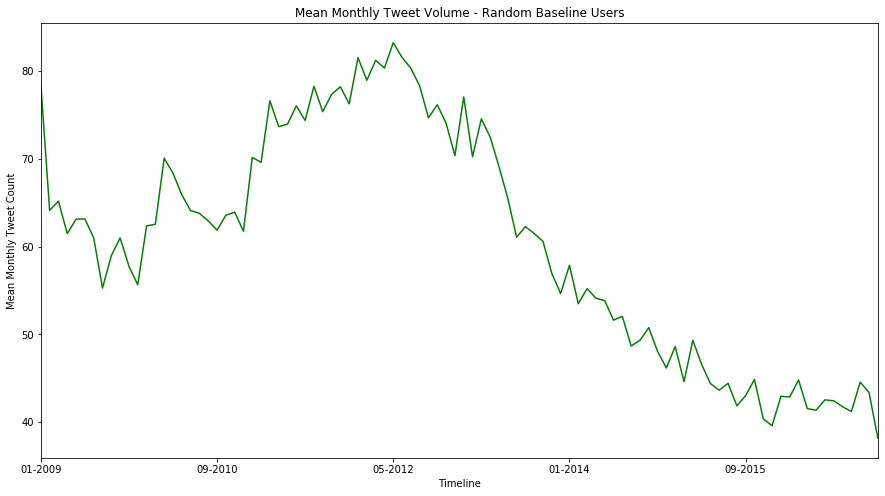

In [23]:
plt.figure()
tweet_countDF.mean().plot(kind='line', color='green', figsize=(15,8),title='Mean Monthly Tweet Volume - Random Baseline Users')
# plt.legend(('Trump','Hillary'))
plt.ylabel('Mean Monthly Tweet Count')
plt.xlabel('Timeline')
plt.savefig('RB_graphics/rb_tweetcount.png')
plt.show()

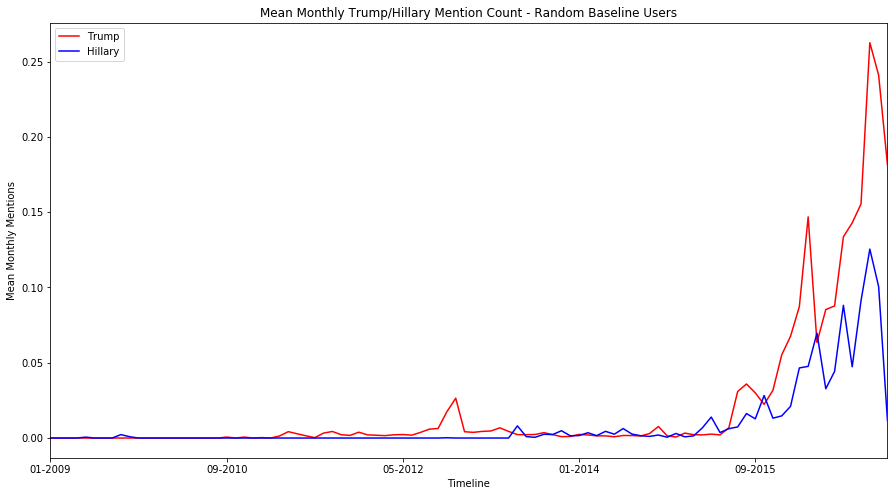

In [24]:
plt.figure()
trump_countDF.mean().plot(kind='line', color='red', figsize=(15,8),title='Mean Monthly Trump/Hillary Mention Count - Random Baseline Users')
clinton_countDF.mean().plot(kind='line', color='blue', figsize=(15,8))
plt.legend(('Trump','Hillary'))
plt.ylabel('Mean Monthly Mentions')
plt.savefig('RB_graphics/rb_mentions.png')
plt.xlabel('Timeline')
plt.show()

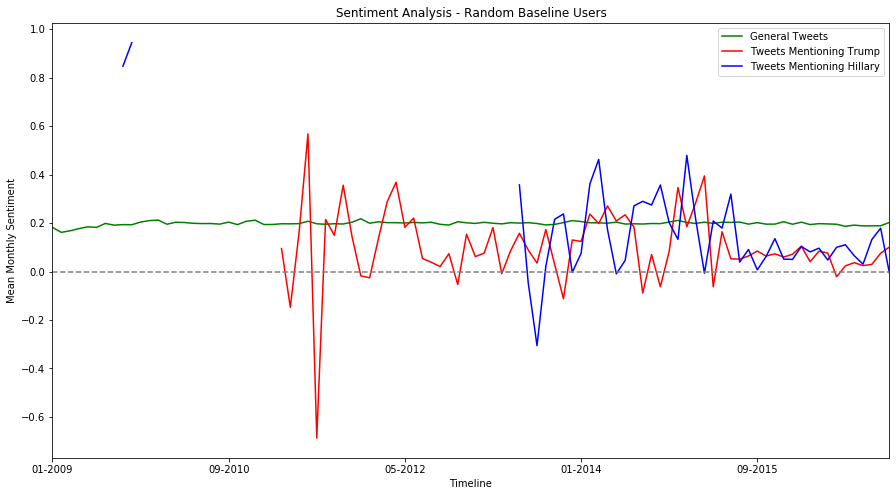

In [25]:
plt.figure()
sentiment_scoresDF.mean().plot(kind='line', color='green', figsize=(15,8),title='Sentiment Analysis - Random Baseline Users')
trump_sentDF.mean().plot(kind='line', color='red', figsize=(15,8))
clinton_sentDF.mean().plot(kind='line', color='blue', figsize=(15,8))
plt.legend(('General Tweets','Tweets Mentioning Trump','Tweets Mentioning Hillary'))
plt.axhline(0, color="grey", linestyle="--")
plt.ylabel('Mean Monthly Sentiment')
plt.savefig('RB_graphics/rb_sentiment.png')
plt.xlabel('Timeline')
plt.show()